In [1]:
from tfumap.load_datasets import load_MNIST, mask_labels

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import pandas as pd

In [3]:
X_train, X_test, X_valid, Y_train, Y_test, Y_valid = load_MNIST(flatten=False)
X_train.shape

(50000, 28, 28, 1)

In [4]:
lpc_list = [1,4,16,64,256,1024]

In [5]:
X_train_flat = np.reshape(X_train, (len(X_train), np.product(np.shape(X_train)[1:])))

In [6]:
loc_df = pd.DataFrame(columns = ['nex', 'z'])
loc_df['z'] = loc_df['z'].astype(object)

for labels_per_class in lpc_list:
    if labels_per_class == "full":
        X_labeled = X_train
        Y_masked = Y_labeled = Y_train
    else:
        X_labeled, Y_labeled, Y_masked = mask_labels(
            X_train, Y_train, labels_per_class=labels_per_class
        )
    z = umap.UMAP(verbose=True,target_weight=1.0).fit_transform(X_train_flat, Y_masked, )
    loc_df.loc[len(loc_df)] = [labels_per_class, z]
loc_df

UMAP(dens_frac=0.0, dens_lambda=0.0, target_weight=1.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug  7 15:42:46 2020 Finding Nearest Neighbors
Fri Aug  7 15:42:46 2020 Building RP forest with 16 trees
Fri Aug  7 15:42:48 2020 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
Fri Aug  7 15:42:59 2020 Finished Nearest Neighbor Search
Fri Aug  7 15:43:02 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Aug  7 15:44:17 2020 Finished embedding
UMAP(dens_frac=0.0, dens_lambda=0.0, target_weight=1.0, verbose=True)
Construct fuzzy simplicial set
Fri Aug  7 15:44:17 2020 Finding Nearest Neighbors
Fri Aug  7 15:44:17 2020 Building RP forest with 16 trees
Fri Aug  7 

,nex,z
0,1,"[[5.391059, 7.457961], [15.348016, 6.4876714],..."
1,4,"[[3.1054761, 4.276024], [14.883252, 5.422789],..."
2,16,"[[5.374241, 7.2714286], [14.603691, 8.232009],..."
3,64,"[[5.104137, 7.5106044], [14.964583, 5.7086086]..."
4,256,"[[3.284315, 5.024434], [15.175851, 7.378704], ..."
5,1024,"[[5.4238114, 7.25081], [15.431314, 6.853528], ..."


In [7]:
from scipy.spatial import procrustes

In [8]:
z0 = loc_df.loc[5, 'z']

In [9]:
from tfumap.paths import FIGURE_DIR, save_fig, ensure_dir

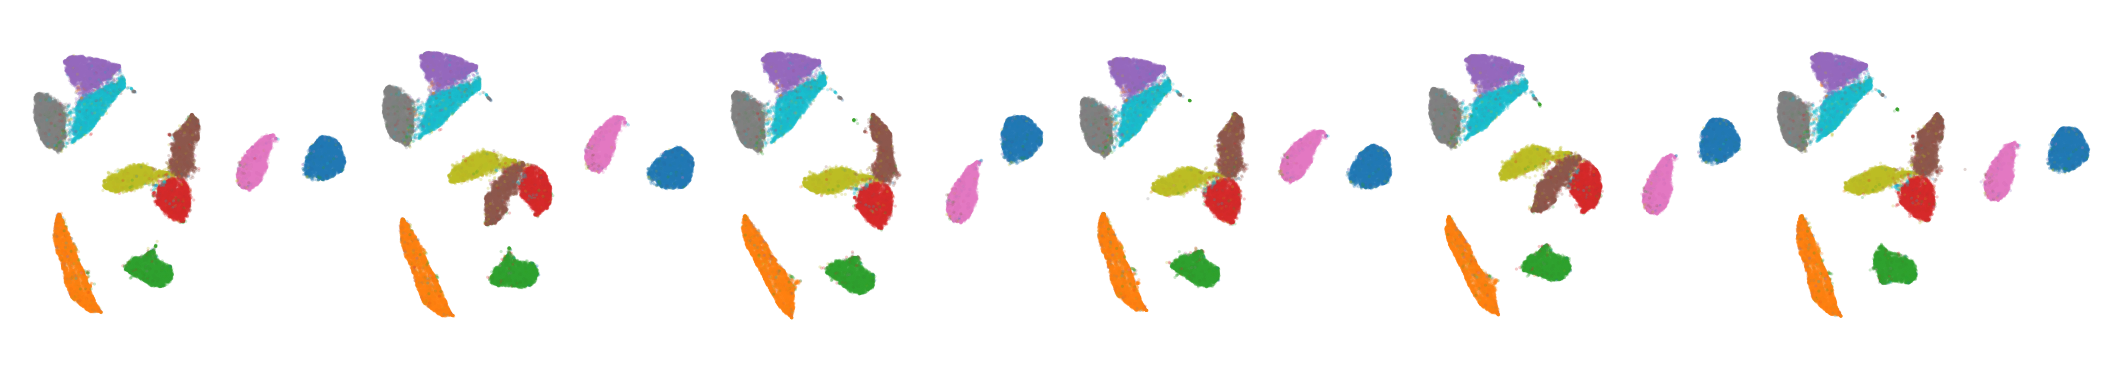

In [11]:
fig, axs = plt.subplots(ncols=6, figsize=(18, 3), dpi=150, gridspec_kw = {'wspace':0, 'hspace':0})
for i, (idx, row) in enumerate(loc_df.iterrows()):
    z = row.z
    z0_align, z_align, disparity = procrustes(z0, z)
    ax = axs[i]
    ax.scatter(
        z_align[:, 0], 
        z_align[:, 1], 
        s=0.25,
        c=Y_train, 
        cmap=plt.cm.tab10, 
        alpha = 0.25,
        rasterized=True
    )
    ax.axis("equal")
    n = 0.1
    xmin = np.percentile(z_align[:, 0], n)
    xmax = np.percentile(z_align[:, 0], 100 - n)
    ymin = np.percentile(z_align[:, 1], n)
    ymax = np.percentile(z_align[:, 1], 100 - n)
    # print(xmin, xmax, xmin, ymax)
    xdiff = (xmax - xmin) / 15
    ydiff = (ymax - ymin) / 15
    xmin = xmin - xdiff
    xmax = xmax + xdiff
    ymin = ymin - ydiff
    ymax = ymax + ydiff

    # print(xmin, xmax, xmin, ymax)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])

    ax.axis("off")
ensure_dir(FIGURE_DIR / 'semisupervised-projections')
save_fig(FIGURE_DIR / 'semisupervised-projections' / 'MNIST-euclidean', save_pdf=True)